Q1)

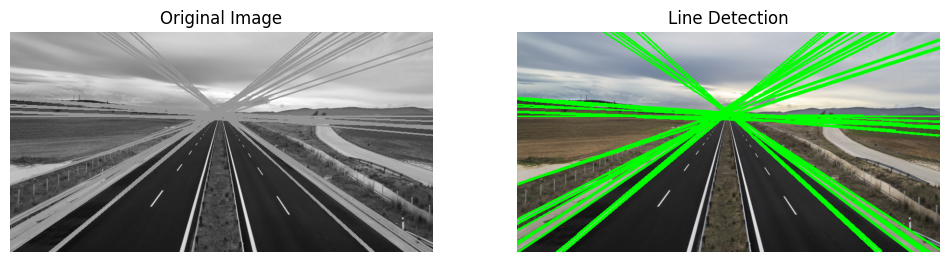

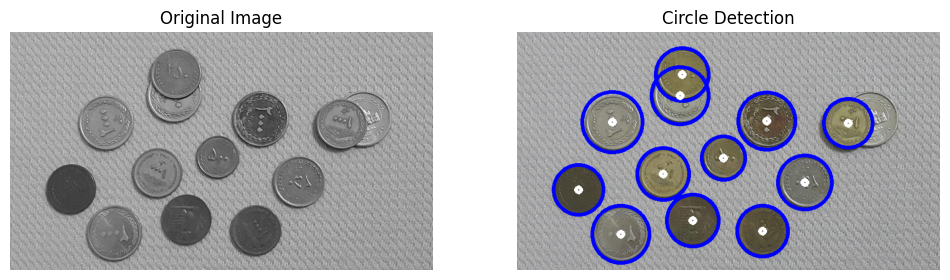

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def func1(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    edges = cv.Canny(gray, 50, 150)
    lines = cv.HoughLines(edges, 1, np.pi/180, 200)

    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    edges = cv.Canny(gray, 50, 150)
    lines = cv.HoughLinesP(edges, 1, np.pi/180, threshold=200, minLineLength=100, maxLineGap=10)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title("Line Detection")
    plt.axis('off')

    plt.show()

def func2(im):
    gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
    gray_blurred = cv.GaussianBlur(gray, (21, 21), 0)

    detected_circles = cv.HoughCircles(gray_blurred, cv.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30,
                                       minRadius=10, maxRadius=250)

    xcord = []
    ycord = []

    if detected_circles is not None:
        detected_circles = np.round(detected_circles[0, :]).astype('int')
        for (x, y, r) in detected_circles:
            xcord.append(x)
            ycord.append(y)
            cv.circle(im, (x, y), r, (255, 0, 0), 5)
            cv.circle(im, (x, y), 5, (255, 255, 255), 5)

    cv.imwrite("Detected_Circles.jpg", im)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    plt.title("Circle Detection")
    plt.axis('off')

    plt.show()

img = cv.imread(cv.samples.findFile('/content/highway.jpg'))
func1(img)

im = cv.imread(cv.samples.findFile('/content/coins.jpg'))
func2(im)


Q3)

Image size at level 1: 416 x 800
Image size at level 2: 416 x 800
Image size at level 3: 416 x 800
Image size at level 1: 450 x 800
Image size at level 2: 450 x 800
Image size at level 3: 450 x 800


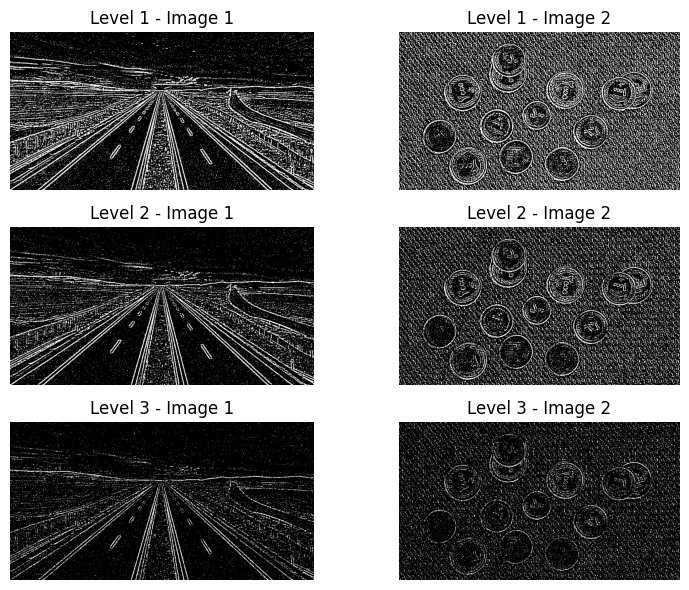

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def generate_gaussian_kernel(sigma, size):
    kernel = cv2.getGaussianKernel(size, sigma)
    return np.outer(kernel, kernel)

def generate_dog_pyramid(image, num_scales, base_sigma):
    dog_pyramid = []

    for i in range(num_scales):
        sigma1 = base_sigma * (1.5 ** i)
        sigma2 = base_sigma * (1.5 ** (i + 1))

        kernel1 = generate_gaussian_kernel(sigma1, 5)
        kernel2 = generate_gaussian_kernel(sigma2, 5)

        blurred1 = cv2.filter2D(image, -1, kernel1)
        blurred2 = cv2.filter2D(image, -1, kernel2)

        dog_image = blurred1 - blurred2
        dog_pyramid.append(dog_image)

        print(f"Image size at level {i + 1}: {dog_image.shape[0]} x {dog_image.shape[1]}")

    return dog_pyramid

image1 = cv2.imread('/content/highway.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/coins.jpg', cv2.IMREAD_GRAYSCALE)

num_scales = 3
base_sigma = 1.4

dog_pyramid1 = generate_dog_pyramid(image1, num_scales, base_sigma)
dog_pyramid2 = generate_dog_pyramid(image2, num_scales, base_sigma)

# Display images side by side
fig, axes = plt.subplots(nrows=num_scales, ncols=2, figsize=(8, 2*num_scales))

for i in range(num_scales):
    axes[i, 0].imshow(dog_pyramid1[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f'Level {i + 1} - Image 1')

    axes[i, 1].imshow(dog_pyramid2[i], cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f'Level {i + 1} - Image 2')

plt.tight_layout()
plt.show()


Q2) using opencv

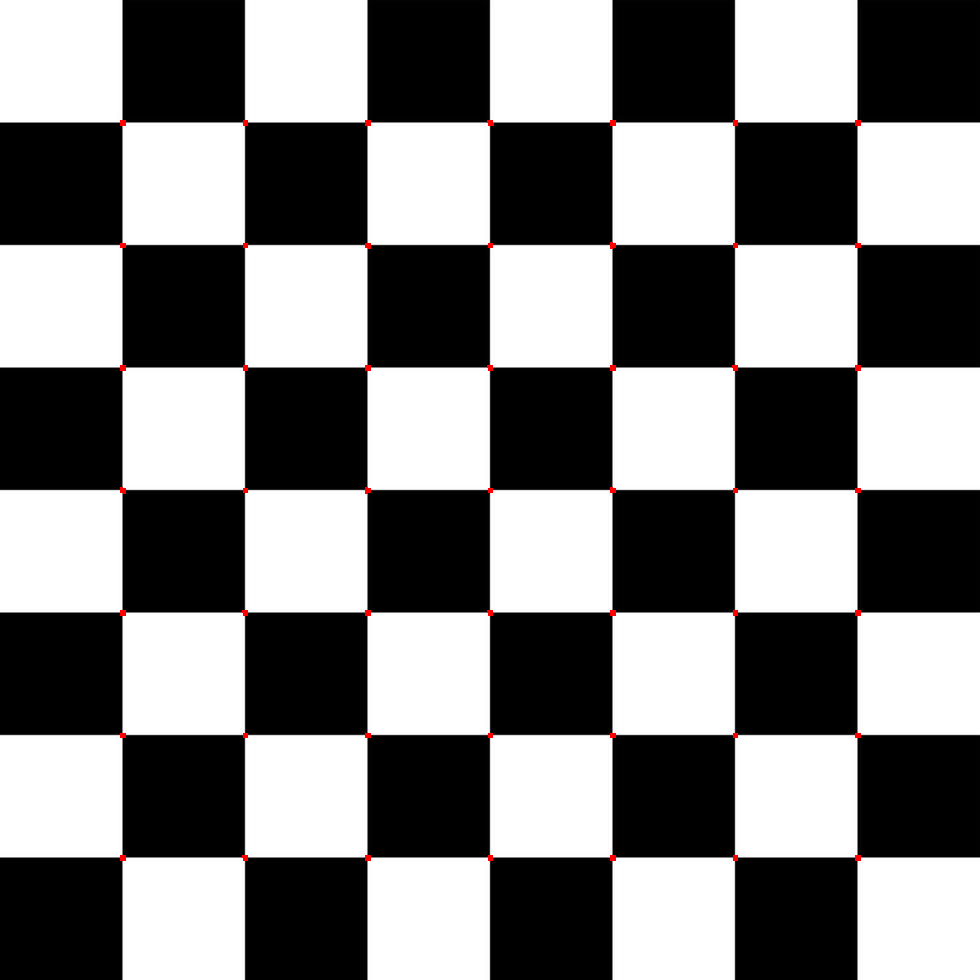

In [46]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

filename = 'modern-black-chess-board-with-letters-and-numbers-background-design-illustration-free-vector.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)

dst = cv.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]

cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

Q2) Manually

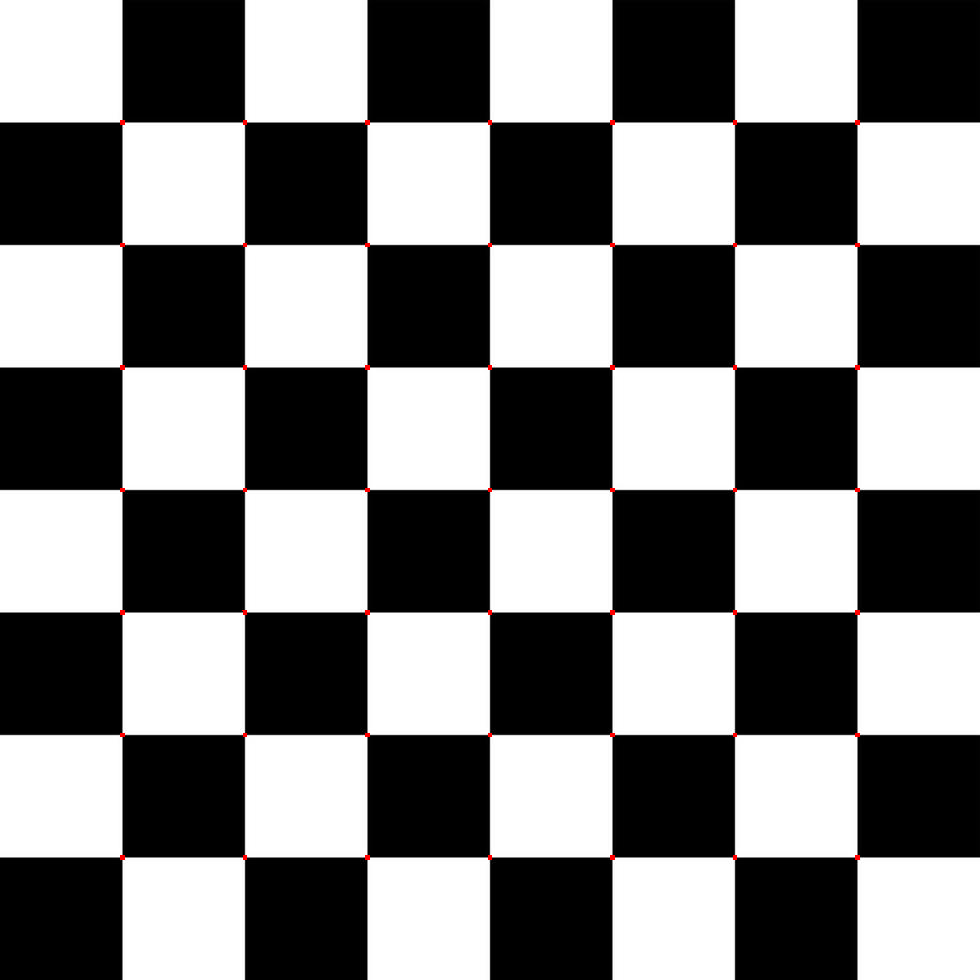

In [47]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def harris_corner_detection(image, k=0.04, threshold=0.01):

    dx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    dy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    Ixx = dx ** 2
    Ixy = dx * dy
    Iyy = dy ** 2

    window_size = 3
    kernel = np.ones((window_size, window_size), dtype=np.float32)
    Sxx = cv2.filter2D(Ixx, -1, kernel)
    Sxy = cv2.filter2D(Ixy, -1, kernel)
    Syy = cv2.filter2D(Iyy, -1, kernel)

    det_M = Sxx * Syy - Sxy ** 2
    trace_M = Sxx + Syy
    R = det_M - k * (trace_M ** 2)

    corner_threshold = threshold * np.max(R)
    corners = np.zeros_like(R, dtype=np.uint8)
    corners[R > corner_threshold] = 255

    return corners

image_gray = cv2.imread('modern-black-chess-board-with-letters-and-numbers-background-design-illustration-free-vector.jpg', cv2.IMREAD_GRAYSCALE)
corners_custom = harris_corner_detection(image_gray)
image_color = cv2.cvtColor(image_gray, cv2.COLOR_GRAY2BGR)
image_color[corners_custom == 255] = [0, 0, 255]
cv2_imshow(image_color)